In [ ]:
# MRV VYSHNAVI
# BL.EN.U4CSE21114

In [ ]:
#A1

C:\Users\mudun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


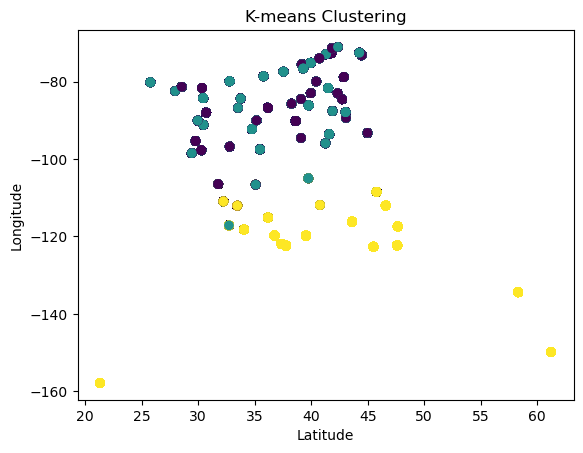

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df = pd.read_csv("ML_Dataset_final.csv")


df = df.drop(columns=['Music Genre Preferences'])


features = df[['Latitude', 'Longitude', 'Temperature (°C)', 'Humidity (%)']]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


k = 3  


kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)


plt.scatter(df['Latitude'], df['Longitude'], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


In [2]:
pip install pandas scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#A2

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df = pd.read_csv("ML_Dataset_final.csv")


df = df.drop(columns=['Music Genre Preferences'])


features = df[['Latitude', 'Longitude', 'Temperature (°C)', 'Humidity (%)']]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


avg_distances = []

for k in range(1, 32):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  
    kmeans.fit(features_scaled)
    
   
    avg_distances.append(kmeans.inertia_)


plt.plot(range(1, 32), avg_distances, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


df = pd.read_csv("ML_Dataset_final.csv")


df = df.drop(columns=['Music Genre Preferences'])


features = df[['Latitude', 'Longitude', 'Temperature (°C)', 'Humidity (%)']]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


linkage_matrix = linkage(features_scaled, method='ward')


plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt


df = pd.read_csv("ML_Dataset_final.csv")


df = df.drop(columns=['Music Genre Preferences'])

X = df.drop(columns=['Weather Condition'])
y = df['Weather Condition']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)


sfs_forward = SequentialFeatureSelector(clf, n_features_to_select='best', direction='forward')
sfs_forward.fit(X_train, y_train)


selected_features_forward = X.columns[sfs_forward.support_]
selected_indices_forward = sfs_forward.get_support(indices=True)


sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='best', direction='backward')
sfs_backward.fit(X_train, y_train)


selected_features_backward = X.columns[sfs_backward.support_]
selected_indices_backward = sfs_backward.get_support(indices=True)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(selected_indices_forward)), sfs_forward.estimator_.feature_importances_[selected_indices_forward])
plt.title('Forward Feature Selection')
plt.xlabel('Selected Features')
plt.ylabel('Feature Importance')

plt.subplot(1, 2, 2)
plt.bar(range(len(selected_indices_backward)), sfs_backward.estimator_.feature_importances_[selected_indices_backward])
plt.title('Backward Feature Selection')
plt.xlabel('Selected Features')
plt.ylabel('Feature Importance')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("ML_Dataset_final.csv")

df = df.drop(columns=['Music Genre Preferences'])


X = df.drop(columns=['Weather Condition'])
y = df['Weather Condition']


scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X_standardized)


cumulative_variance = pca.explained_variance_ratio_.cumsum()

target_variance = 0.95
num_features_needed = sum(cumulative_variance < target_variance) + 1


print("Cumulative Explained Variance along Principal Components:")
print(cumulative_variance)


print(f"\nNumber of features needed for {target_variance*100}% variance: {num_features_needed}")


plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance along Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv("ML_Dataset_final.csv")


df = df.drop(columns=['Music Genre Preferences'])


X = df.drop(columns=['Weather Condition'])
y = df['Weather Condition']


scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_standardized)


target_variance = 0.95
num_components = sum(pca.explained_variance_ratio_.cumsum() < target_variance) + 1


X_transformed = X_pca[:, :num_components]


X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using {num_components} principal components: {accuracy * 100:.2f}%")
